In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import ptitprince as pt

In [3]:
NOMBRE_ARCH = 'Entrenamiento_ECI_2020.csv'

In [4]:
df = pd.read_csv(NOMBRE_ARCH, dtype={'Region': 'category',    'Territory': 'category',
                                     'Bureaucratic_Code': 'category',    'Source': 'category',
                                     'Billing_Country': 'category',    'Account_Name': 'category',
                                     'Opportunity_Name': 'category',    'Account_Owner': 'category',
                                     'Opportunity_Owner': 'category',    'Account_Type': 'category',
                                     'Opportunity_Type': 'category',    'Quote_Type': 'category',
                                     'Delivery_Terms': 'category',    'Brand': 'category',
                                     'Product_Type': 'category',    'Size': 'category',
                                     'Product_Category_B': 'category',    'Currency': 'category',
                                     'Last_Modified_By': 'category',    'Product_Family': 'category',
                                     'Product_Name': 'category',    'ASP_Currency': 'category',
                                     'ASP_(converted)_Currency': 'category',    'Delivery_Quarter': 'category',
                                     'Total_Amount_Currency': 'category',    'Total_Taxable_Amount_Currency': 'category',
                                     'Stage': 'category',    'Prod_Category_A': 'category',
                                     'Pricing, Delivery_Terms_Quote_Appr':'bool', 'Pricing, Delivery_Terms_Approved':'bool',
                                     'Bureaucratic_Code_0_Approval':'bool', 'Bureaucratic_Code_0_Approved':'bool',
                                     'Submitted_for_Approval':'bool'
                                     })

In [5]:
df['Account_Created_Date']=pd.to_datetime(df['Account_Created_Date'])
df['Quote_Expiry_Date']=pd.to_datetime(df['Quote_Expiry_Date'])
df['Opportunity_Created_Date']=pd.to_datetime(df['Opportunity_Created_Date'])
df['Last_Modified_Date']=pd.to_datetime(df['Last_Modified_Date'])
df['Quote_Expiry_Date']=pd.to_datetime(df['Quote_Expiry_Date'])
df['Planned_Delivery_Start_Date']=pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date']=pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Actual_Delivery_Date']=pd.to_datetime(df['Actual_Delivery_Date'])

In [6]:
df.drop(columns=['Actual_Delivery_Date', 'Last_Activity', 'Prod_Category_A'], inplace= True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 4   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 5   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 6   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 7   Submitted_for_Approval              16947 non-null  bool          
 8   Bureaucratic_Code                   16947 non-null  category      
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [8]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,...,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,...,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,...,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


In [9]:
df_año= df.groupby('Stage')

In [10]:
df['Price'].replace(to_replace=['None', 'Other'], value=0, inplace=True)

In [11]:
df['Price']=df['Price'].astype('float64')

In [12]:
df['Price'].describe()

count    16947.000000
mean         0.006729
std          0.047193
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.560000
Name: Price, dtype: float64

In [13]:
df['Delivery_Year'].value_counts()

2017    6318
2018    5830
2016    4371
2019     414
2020      14
Name: Delivery_Year, dtype: int64

In [14]:
df.Month.value_counts()

2018 - 10    666
2017 - 6     643
2017 - 10    638
2016 - 3     628
2017 - 7     625
2017 - 5     586
2018 - 4     579
2017 - 12    574
2018 - 6     542
2018 - 7     536
2017 - 8     513
2018 - 2     498
2017 - 9     491
2017 - 3     487
2017 - 4     475
2018 - 3     467
2018 - 1     466
2018 - 5     461
2018 - 11    459
2017 - 11    450
2017 - 1     444
2018 - 8     440
2016 - 2     440
2018 - 9     406
2017 - 2     392
2016 - 4     383
2016 - 11    381
2016 - 9     380
2016 - 10    359
2016 - 6     352
2016 - 5     341
2016 - 8     313
2018 - 12    310
2016 - 7     306
2016 - 12    292
2016 - 1     196
2019 - 1     186
2019 - 2      58
2019 - 3      46
2019 - 4      44
2019 - 7      25
2019 - 6      25
2019 - 10     13
2019 - 5       8
2020 - 1       7
2019 - 8       5
2020 - 4       3
2019 - 9       2
2020 - 3       2
2019 - 12      1
2019 - 11      1
2020 - 6       1
2020 - 9       1
Name: Month, dtype: int64

In [15]:

df['Month']=pd.to_datetime(df['Month'])

In [16]:
df.Month

0       2016-05-01
1       2016-01-01
2       2016-01-01
3       2018-02-01
4       2018-02-01
           ...    
16942   2016-03-01
16943   2016-04-01
16944   2016-03-01
16945   2016-04-01
16946   2016-07-01
Name: Month, Length: 16947, dtype: datetime64[ns]

In [17]:
df.Currency.value_counts()

None    16052
EUR       475
USD       420
Name: Currency, dtype: int64

In [18]:
df.Currency.head()

0    None
1    None
2    None
3     USD
4     USD
Name: Currency, dtype: category
Categories (3, object): ['EUR', 'None', 'USD']

In [19]:
df['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [20]:
df.Product_Type.head()

0              None
1              None
2              None
3    Product_Type_0
4    Product_Type_0
Name: Product_Type, dtype: category
Categories (7, object): ['None', 'Other', 'Product_Type_0', 'Product_Type_1', 'Product_Type_2', 'Product_Type_3', 'Product_Type_4']

In [21]:
!pip install CurrencyConverter

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [22]:
from currency_converter import CurrencyConverter
c = CurrencyConverter(fallback_on_missing_rate=True)

In [23]:
df['Total_Amount_(converted)']= df.apply(lambda x: c.convert(x.Total_Amount, x.Total_Amount_Currency, 'USD', date=x.Last_Modified_Date), axis=1)
df['Total_Taxable_Amount_(converted)']= df.apply(lambda x: c.convert(x.Total_Taxable_Amount, x.Total_Taxable_Amount_Currency, 'USD', date=x.Last_Modified_Date), axis=1)

In [24]:
df_product_type = df.groupby(['Product_Type', 'ASP_(converted)'])['Total_Taxable_Amount_(converted)'].mean()

In [25]:
df_product_type

Product_Type    ASP_(converted)
None            0.00000             19764.829657
                0.00001                 0.184140
                0.00378              9150.573374
                0.15000            109417.785849
                0.16000             20189.493750
                                       ...      
Product_Type_4  1.00000                      NaN
                1.60000                      NaN
                1.70000                      NaN
                57.68578                     NaN
                67.00000                     NaN
Name: Total_Taxable_Amount_(converted), Length: 3087, dtype: float64

In [26]:
df_price = df.groupby([ 'Region','Stage'])['ASP_(converted)'].mean().reset_index()


In [27]:
df_price.head(10)

,Region,Stage,ASP_(converted)
0,APAC,Closed Lost,0.393111
1,APAC,Closed Won,0.354736
2,APAC,Negotiation,NaN
3,APAC,Proposal,0.316250
4,APAC,Qualification,0.296667
5,Americas,Closed Lost,0.463275
6,Americas,Closed Won,0.448021
7,Americas,Negotiation,0.360000
8,Americas,Proposal,0.346667
9,Americas,Qualification,NaN


In [28]:
df_price.dropna(inplace = True)

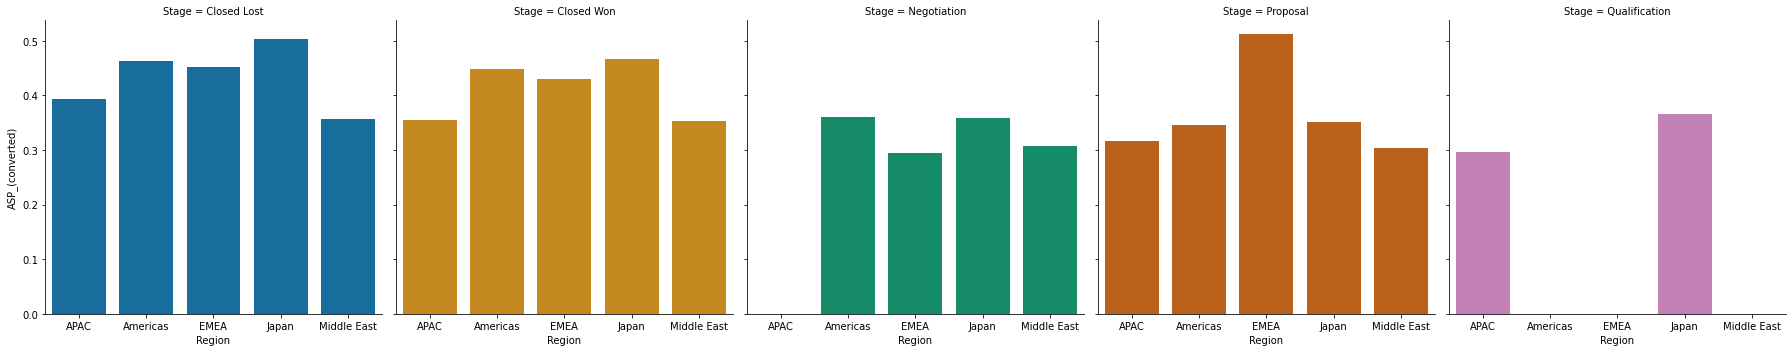

In [29]:
g = sns.catplot(x="Region", y="ASP_(converted)",
                hue="Stage", col="Stage",
                data=df_price, kind="bar",
                dodge=False, palette='colorblind')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 4   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 5   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 6   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 7   Submitted_for_Approval              16947 non-null  bool          
 8   Bureaucratic_Code                   16947 non-null  category      
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [31]:
df.groupby('Stage')['Total_Taxable_Amount'].mean()

Stage
Closed Lost      4.793196e+06
Closed Won       1.787157e+06
Negotiation      7.249430e+05
Proposal         4.550562e+07
Qualification    6.967316e+07
Name: Total_Taxable_Amount, dtype: float64

In [32]:
df_precioregion = df.groupby(['Product_Type', 'Region'])['Total_Taxable_Amount'].mean()

In [33]:
df_precioregion

Product_Type    Region     
None            APAC           1.477597e+06
                Americas       3.960935e+06
                EMEA           1.520619e+06
                Japan          4.616757e+06
                Middle East    2.249899e+06
Other           APAC           1.595506e+07
                Americas       3.861512e+06
                EMEA           1.289479e+06
                Japan          4.684900e+06
                Middle East    1.446490e+05
Product_Type_0  APAC           6.415123e+05
                Americas       2.845772e+06
                EMEA           6.277512e+05
                Japan          1.698735e+07
                Middle East    9.137700e+04
Product_Type_1  APAC           1.284095e+06
                Americas       1.631713e+07
                EMEA           2.853270e+06
                Japan          6.905273e+07
                Middle East    4.370770e+05
Product_Type_2  APAC           1.596000e+05
                Americas       4.166910e+04
    

In [34]:
df_preciomarca = df.groupby(['Brand'])['Total_Taxable_Amount_(converted)'].mean().reset_index()

In [35]:
df_preciomarca

,Brand,Total_Taxable_Amount_(converted)
0,Brand_0,2.318318e+05
1,Brand_1,1.734085e+05
2,Brand_10,6.927970e+05
3,Brand_11,9.699410e+05
4,Brand_12,2.927796e+05
5,Brand_13,2.952267e+06
6,Brand_16,2.383500e+05
7,Brand_17,8.920171e+05
8,Brand_19,1.600027e+07
9,Brand_2,4.869938e+05


In [366]:
df_precioproducto = df.groupby('Product_Name').agg({'TRF':'mean', 'Total_Taxable_Amount_(converted)':'mean', 'Opportunity_ID':'count'}).reset_index()

In [367]:
df_precioproducto = df_precioproducto[(df_precioproducto.TRF >0 )& (df_precioproducto['Total_Taxable_Amount_(converted)'] > 0.0)]

In [368]:
df_precioproducto

,Product_Name,TRF,Total_Taxable_Amount_(converted),Opportunity_ID
10,Product_Name_107,1.000000,6.306498e+05,82
11,Product_Name_108,2.000000,9.304608e+05,16
12,Product_Name_109,20.375000,9.612091e+06,16
14,Product_Name_110,5.287234,6.727262e+06,94
16,Product_Name_112,1.000000,3.515650e+05,2
...,...,...,...,...
448,Product_Name_99,5.188976,3.201497e+06,127
449,Product_Name_136,2.000000,1.418440e+06,1
450,Product_Name_151,11.000000,1.880644e+07,1
451,Product_Name_288,80.000000,5.138560e+07,1


In [369]:
df_precioproducto['Total_Taxable_Amount_(converted)'] = df_precioproducto['Total_Taxable_Amount_(converted)']/1000000

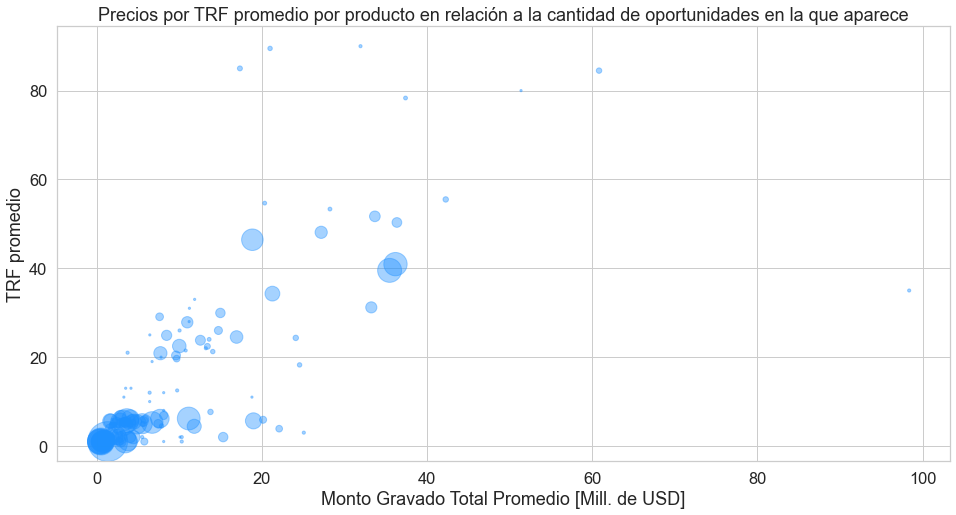

In [370]:
plt.figure(figsize=(16,8))
plt.title('Precios por TRF promedio por producto en relación a la cantidad de oportunidades en la que aparece')
plt.ylabel('TRF promedio')
plt.xlabel('Monto Gravado Total Promedio [Mill. de USD]')
plt.scatter(df_precioproducto['Total_Taxable_Amount_(converted)'], df_precioproducto.TRF,\
            s=5*df_precioproducto.Opportunity_ID, alpha=0.4, color= 'dodgerblue')
plt.rcParams.update({'font.size': 18})

<Figure size 1152x576 with 0 Axes>

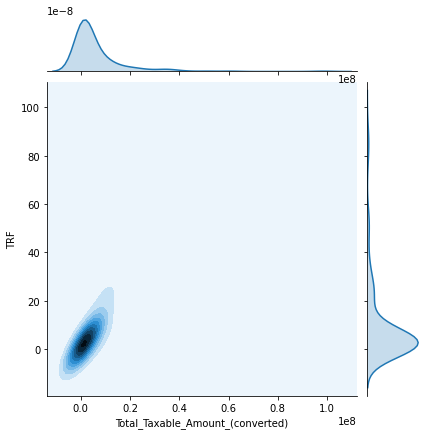

In [41]:
plt.figure(figsize=(16,8))
sns.jointplot(x=df_precioproducto['Total_Taxable_Amount_(converted)'], y=df_precioproducto.TRF, kind='kde')


In [42]:
df['delta_oportunidad'] = df.Last_Modified_Date -df.Opportunity_Created_Date

In [43]:
df.groupby(['Opportunity_ID', 'Stage'])

In [44]:
df_test = df[df.Opportunity_ID == 12801]

In [45]:
df_test

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Total_Amount_(converted),Total_Taxable_Amount_(converted),delta_oportunidad
16942,8781,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016,0,EUR,103350.0,EUR,299715.0,Closed Won,112320.780,325730.262,46 days
16943,8786,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016,0,EUR,93015.0,EUR,299715.0,Closed Won,101088.702,325730.262,46 days
16944,8792,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016,0,EUR,103350.0,EUR,299715.0,Closed Won,112320.780,325730.262,46 days


In [46]:
df['Total_Taxable_Amount_(converted)'].head()

0    5.941391e+06
1    5.263822e+04
2    8.386560e+04
3    7.421882e+06
4    1.335719e+07
Name: Total_Taxable_Amount_(converted), dtype: float64

In [47]:
df_deltastage = df.groupby(['Opportunity_ID'])['delta_oportunidad', 'Stage', 'Region'].head()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [48]:
df_deltastage['Normalized_delta']= df_deltastage.delta_oportunidad/df_deltastage.delta_oportunidad.max()

In [49]:
df_deltastage.drop(columns='delta_oportunidad')
df_deltastage_mean = df_deltastage.groupby(['Stage', 'Region'])['Normalized_delta'].mean()

In [50]:

df_deltastage_mean.reset_index()
df_deltastage_mean.dropna()

Stage          Region     
Closed Lost    APAC           0.122422
               Americas       0.113300
               EMEA           0.105222
               Japan          0.140933
               Middle East    0.112981
Closed Won     APAC           0.095763
               Americas       0.085554
               EMEA           0.100379
               Japan          0.087546
               Middle East    0.063189
Negotiation    Americas       0.000563
               EMEA           0.055775
               Japan          0.049014
               Middle East    0.022394
Proposal       APAC           0.005423
               Americas       0.000423
               EMEA           0.028545
               Japan          0.020966
               Middle East    0.011455
Qualification  APAC           0.000000
               Japan          0.000000
Name: Normalized_delta, dtype: float64

In [51]:
df_deltastage

,delta_oportunidad,Stage,Region,Normalized_delta
0,189 days,Closed Lost,EMEA,0.106479
1,39 days,Closed Won,EMEA,0.021972
2,296 days,Closed Won,Americas,0.166761
3,840 days,Closed Lost,Americas,0.473239
4,840 days,Closed Lost,Americas,0.473239
...,...,...,...,...
16942,46 days,Closed Won,EMEA,0.025915
16943,46 days,Closed Won,EMEA,0.025915
16944,46 days,Closed Won,EMEA,0.025915
16945,48 days,Closed Lost,Americas,0.027042


<AxesSubplot:xlabel='Stage', ylabel='Normalized_delta'>

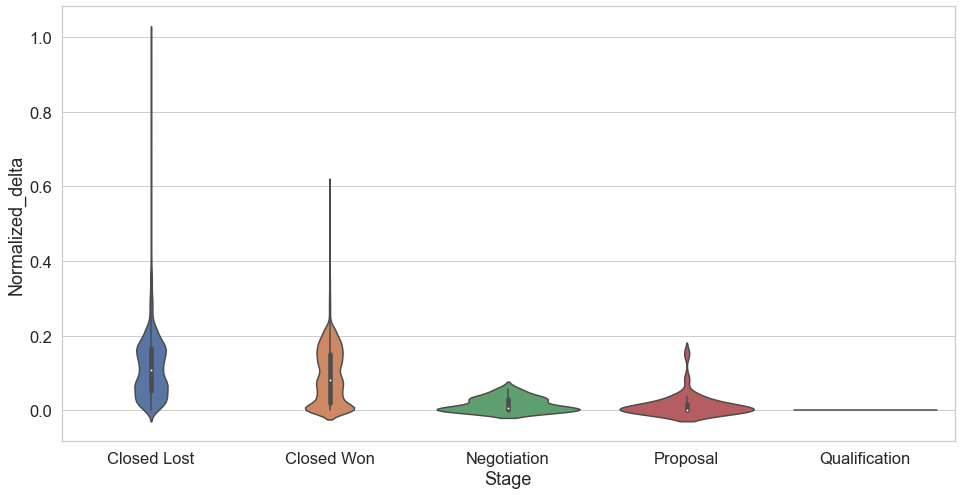

In [217]:
plt.figure(figsize= (16,8))
sns.violinplot(x ='Stage', y ='Normalized_delta', data = df_deltastage) 

In [53]:
df.Last_Modified_Date.max()

Timestamp('2018-12-29 00:00:00')

In [54]:
df.Last_Modified_Date.min()

Timestamp('2015-03-12 00:00:00')

In [55]:
df_won = df[df['Stage'] == 'Closed Won']
df_won = df_won[['Opportunity_ID', 'Region', 'Last_Modified_Date', 'Total_Amount_(converted)']] 
df_won

,Opportunity_ID,Region,Last_Modified_Date,Total_Amount_(converted)
1,1,EMEA,2016-01-15,52638.222
2,2,Americas,2016-09-29,83865.600
7,7,Americas,2015-12-09,50688.000
23,11,APAC,2016-01-07,1621851.000
63,20,EMEA,2015-12-09,113075.235
...,...,...,...,...
16937,12797,EMEA,2015-12-18,447960.240
16939,12799,EMEA,2016-04-01,459223.440
16942,12801,EMEA,2016-01-19,112320.780
16943,12801,EMEA,2016-01-19,101088.702


In [56]:

df_won_byID = df_won.groupby(['Last_Modified_Date','Opportunity_ID' ]).agg({'Total_Amount_(converted)':'sum', 'Region':'first'}).reset_index().dropna()
df_won_byID.head()

,Last_Modified_Date,Opportunity_ID,Total_Amount_(converted),Region
0,2015-03-12,12397,0.00,Japan
1,2015-07-22,12389,11111133.92,Americas
2,2015-08-05,12374,12615483.00,Americas
3,2015-08-25,12390,51599056.57,Americas
4,2015-09-10,12372,6282156.00,Americas


In [57]:
df_won_byID

,Last_Modified_Date,Opportunity_ID,Total_Amount_(converted),Region
0,2015-03-12,12397,0.00,Japan
1,2015-07-22,12389,11111133.92,Americas
2,2015-08-05,12374,12615483.00,Americas
3,2015-08-25,12390,51599056.57,Americas
4,2015-09-10,12372,6282156.00,Americas
...,...,...,...,...
5067,2018-12-28,11215,309441.60,Americas
5068,2018-12-29,9486,45240.00,Americas
5069,2018-12-29,9875,123975.00,Americas
5070,2018-12-29,9878,159742.50,Americas


In [58]:
"""plt.figure(figsize= (16,8))
sns.barplot(x="Last_Modified_Date", y="Total_Amount_(converted)",
             hue="Region",
             data=df_won_byID)"""

'plt.figure(figsize= (16,8))\nsns.barplot(x="Last_Modified_Date", y="Total_Amount_(converted)",\n             hue="Region",\n             data=df_won_byID)'

In [59]:
df_won_byID= df_won_byID[df_won_byID['Total_Amount_(converted)'] > 0]

In [60]:
df_won = df[df['Stage'] == 'Closed Won']

In [61]:
df_byStage = df.groupby('Stage').agg({'Total_Taxable_Amount_(converted)':'mean'}).reset_index()

In [62]:
df_byStage

,Stage,Total_Taxable_Amount_(converted)
0,Closed Lost,3.527903e+06
1,Closed Won,6.997508e+05
2,Negotiation,2.776363e+05
3,Proposal,1.488489e+06
4,Qualification,1.182314e+06


(-1.1041990356507039,
 1.1001999583328186,
 -1.1199023884216508,
 1.1077711115161293)

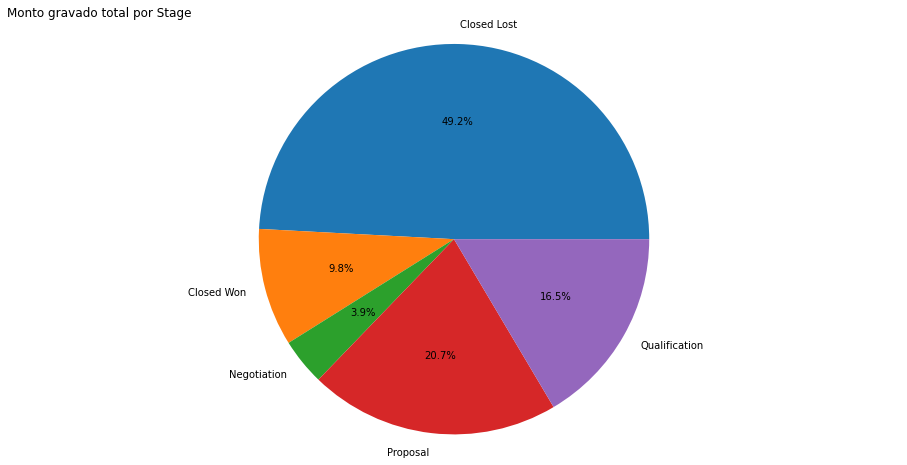

In [68]:
plt.figure(figsize= (16,8))
labels = df_byStage.Stage.tolist()
plt.title('Monto gravado total promedio por Stage', loc='left')
plt.pie(x=df_byStage['Total_Taxable_Amount_(converted)'], labels=labels, autopct="%.1f%%", )
plt.axis('equal')

In [69]:
df_byID = df.groupby(['Opportunity_Owner', 'Stage', 'Opportunity_ID']).agg({'Total_Taxable_Amount_(converted)': 'sum', 'Region':'first'})

In [70]:
df_byID = df_byID.dropna()
df_byID = df_byID.reset_index()

In [71]:
df_byID_won = df_byID[df_byID['Stage'] == 'Closed Won']

In [72]:
df_byID_won = df_byID_won.groupby(['Opportunity_Owner']).agg({'Total_Taxable_Amount_(converted)': 'sum', 'Opportunity_ID':'count' , 'Region':'first'})

In [73]:
df_byID_won = df_byID_won[df_byID_won['Opportunity_ID'] >0 ]
df_byID_won['mean'] = df_byID_won['Total_Taxable_Amount_(converted)'] / df_byID_won['Opportunity_ID']

In [74]:

df_byID_won['meanmill'] =df_byID_won['mean']/1000000
df_byID_won
#Se puede ver que hay una oportunidad ganada con un monto gravado de 0 (Opportunity_Owner de Person_Name_35)

,Total_Taxable_Amount_(converted),Opportunity_ID,Region,mean,meanmill
Opportunity_Owner,,,,,
Person_Name_11,1.389057e+06,26,APAC,5.342525e+04,0.053425
Person_Name_12,2.106306e+08,4,Americas,5.265765e+07,52.657651
Person_Name_13,6.667644e+08,434,EMEA,1.536323e+06,1.536323
Person_Name_14,3.504573e+06,25,EMEA,1.401829e+05,0.140183
Person_Name_16,3.804454e+07,108,EMEA,3.522643e+05,0.352264
Person_Name_18,1.943115e+08,329,EMEA,5.906123e+05,0.590612
Person_Name_19,1.263381e+08,399,APAC,3.166368e+05,0.316637
Person_Name_2,6.288916e+06,44,EMEA,1.429299e+05,0.142930
Person_Name_20,4.949088e+06,29,EMEA,1.706582e+05,0.170658


In [75]:
df_byID_won_sortmean = df_byID_won.sort_values(by= 'mean', ascending = False)
df_byID_won_sortcount = df_byID_won.sort_values(by='Opportunity_ID', ascending = False)

In [76]:
top_10 = df_byID_won_sortmean.head(10)
top_10.reset_index(inplace = True)
top_10.Opportunity_Owner.cat.remove_unused_categories(inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Person_Name_12'),
  Text(1, 0, 'Person_Name_8'),
  Text(2, 0, 'Person_Name_43'),
  Text(3, 0, 'Person_Name_13'),
  Text(4, 0, 'Person_Name_4'),
  Text(5, 0, 'Person_Name_26'),
  Text(6, 0, 'Person_Name_46'),
  Text(7, 0, 'Person_Name_62'),
  Text(8, 0, 'Person_Name_30'),
  Text(9, 0, 'Person_Name_66')])

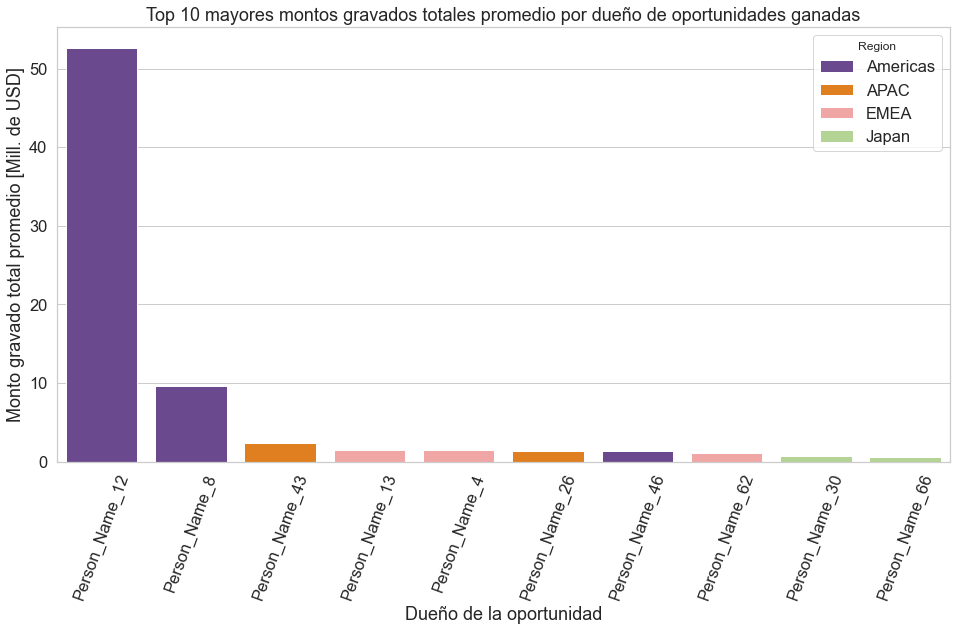

In [229]:
plt.figure(figsize= (16,8))
plt.title('Top 10 mayores montos gravados totales promedio por dueño de oportunidades ganadas')
ax = sns.barplot(x=top_10['Opportunity_Owner'], y="meanmill", hue='Region', data=top_10,
                 dodge = False, order=top_10['Opportunity_Owner'], palette='Paired_r')
ax.set(xlabel='Dueño de la oportunidad', ylabel='Monto gravado total promedio [Mill. de USD]')
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Person_Name_50'),
  Text(1, 0, 'Person_Name_32'),
  Text(2, 0, 'Person_Name_13'),
  Text(3, 0, 'Person_Name_8'),
  Text(4, 0, 'Person_Name_19'),
  Text(5, 0, 'Person_Name_18'),
  Text(6, 0, 'Person_Name_64'),
  Text(7, 0, 'Person_Name_4'),
  Text(8, 0, 'Person_Name_3'),
  Text(9, 0, 'Person_Name_23')])

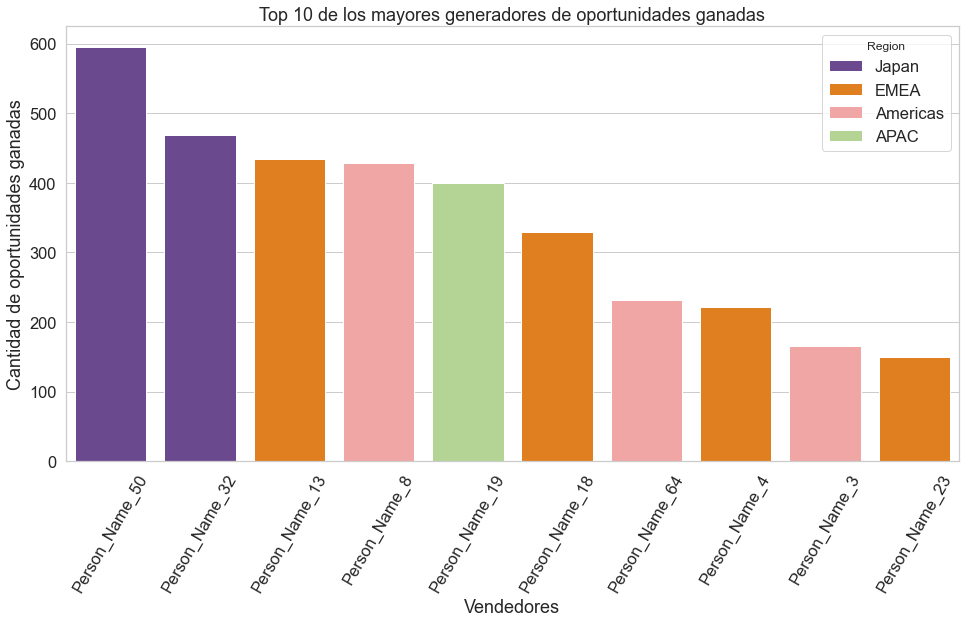

In [227]:
top_10_count = df_byID_won_sortcount.head(10)
top_10_count.reset_index(inplace=True)
top_10_count.Opportunity_Owner.cat.remove_unused_categories(inplace = True)
top_10_count = top_10_count.sort_values(by= 'Opportunity_ID', ascending = False)
plt.figure(figsize= (16,8))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.title('Top 10 de los mayores generadores de oportunidades ganadas')
ax = sns.barplot(x=top_10_count['Opportunity_Owner'], y="Opportunity_ID", hue='Region', data=top_10_count, dodge = False,
                 order= top_10_count['Opportunity_Owner'], palette='Paired_r')
ax.set(xlabel='Vendedores', ylabel='Cantidad de oportunidades ganadas')
plt.xticks(rotation=60)

In [80]:
top_10_count

,Opportunity_Owner,Total_Taxable_Amount_(converted),Opportunity_ID,Region,mean,meanmill
0,Person_Name_50,2.866632e+07,595,Japan,4.817869e+04,0.048179
1,Person_Name_32,5.150340e+07,469,Japan,1.098154e+05,0.109815
2,Person_Name_13,6.667644e+08,434,EMEA,1.536323e+06,1.536323
3,Person_Name_8,4.126211e+09,429,Americas,9.618207e+06,9.618207
4,Person_Name_19,1.263381e+08,399,APAC,3.166368e+05,0.316637
5,Person_Name_18,1.943115e+08,329,EMEA,5.906123e+05,0.590612
6,Person_Name_64,4.155825e+07,231,Americas,1.799058e+05,0.179906
7,Person_Name_4,3.244247e+08,221,EMEA,1.467985e+06,1.467985
8,Person_Name_3,4.992139e+07,165,Americas,3.025539e+05,0.302554
9,Person_Name_23,4.438029e+07,149,EMEA,2.978543e+05,0.297854


In [81]:
df_byID_zero = df_byID[df_byID['Total_Taxable_Amount_(converted)']== 0 ]


In [82]:
df_byID_zero[df_byID['Stage'] == 'Closed Won']['Opportunity_Owner'].unique()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['Person_Name_11', 'Person_Name_3', 'Person_Name_30', 'Person_Name_33', 'Person_Name_35', ..., 'Person_Name_41', 'Person_Name_48', 'Person_Name_52', 'Person_Name_63', 'Person_Name_8']
Length: 13
Categories (13, object): ['Person_Name_11', 'Person_Name_3', 'Person_Name_30', 'Person_Name_33', ..., 'Person_Name_48', 'Person_Name_52', 'Person_Name_63', 'Person_Name_8']

In [83]:
df_stageamount = df_won.groupby(['Opportunity_ID', 'Region']).agg({'Total_Taxable_Amount_(converted)': 'mean'}).dropna()
df_stageamount.reset_index(inplace=True)
df_stageamount= df_stageamount[df_stageamount['Total_Taxable_Amount_(converted)']>0]

In [84]:
"""plt.figure(figsize= (16,20))
sns.swarmplot(x ='Region', y ='Total_Taxable_Amount_(converted)', data = df_stageamount) """

"plt.figure(figsize= (16,20))\nsns.swarmplot(x ='Region', y ='Total_Taxable_Amount_(converted)', data = df_stageamount) "

In [85]:
group= df.groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped = df.loc[df['Pricing, Delivery_Terms_Quote_Appr'] == 1,:].groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped.rename(columns={'Opportunity_ID': 'Pricing, Delivery_Terms_Quote_Appr'}, inplace= True)
grouped2 = df.loc[df['Pricing, Delivery_Terms_Approved'] == 1,:].groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped2.rename(columns={'Opportunity_ID': 'Pricing, Delivery_Terms_Approved'}, inplace= True)
grouped3 = df.loc[(df['Pricing, Delivery_Terms_Approved'] == 1) & (df['Stage'] == 'Closed Won'),:].groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped3.rename(columns={'Opportunity_ID': 'Closed Won'}, inplace= True)
df_binar = group.merge(grouped, on='Region').merge(grouped2, on='Region').merge(grouped3, on='Region')

In [86]:
df_binar

,Region,Opportunity_ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Closed Won
0,APAC,2086,1406,979,614
1,Americas,2459,1759,1140,484
2,EMEA,3241,2462,1885,837
3,Japan,1906,1738,1287,1103
4,Middle East,149,149,125,28


In [179]:
df_bin = df_binar.melt(id_vars=['Region'])
df_bin

,Region,variable,value
0,APAC,Opportunity_ID,2086
1,Americas,Opportunity_ID,2459
2,EMEA,Opportunity_ID,3241
3,Japan,Opportunity_ID,1906
4,Middle East,Opportunity_ID,149
5,APAC,"Pricing, Delivery_Terms_Quote_Appr",1406
6,Americas,"Pricing, Delivery_Terms_Quote_Appr",1759
7,EMEA,"Pricing, Delivery_Terms_Quote_Appr",2462
8,Japan,"Pricing, Delivery_Terms_Quote_Appr",1738
9,Middle East,"Pricing, Delivery_Terms_Quote_Appr",149


In [180]:
fig = go.Figure(px.funnel(df_bin, x='value', y='variable', color='Region', labels=dict(variable='', Region="Región"), width=1200, height=900))

fig.update_layout(title={'text': "Embudo de oportunidades que requieren aprobación de precio y entrega",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [89]:
group_b= df.groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped_b = df.loc[df['Bureaucratic_Code_0_Approval'] == 1,:].groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped_b.rename(columns={'Opportunity_ID': 'Bureaucratic_Code_0_Approval'}, inplace= True)
grouped2_b = df.loc[df['Bureaucratic_Code_0_Approved'] == 1,:].groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped2_b.rename(columns={'Opportunity_ID': 'Bureaucratic_Code_0_Approved'}, inplace= True)
grouped3_b = df.loc[(df['Bureaucratic_Code_0_Approved'] == 1) & (df['Stage'] == 'Closed Won'),:].groupby('Region').agg({'Opportunity_ID': pd.Series.nunique}).reset_index()
grouped3_b.rename(columns={'Opportunity_ID': 'Closed Won'}, inplace= True)
df_binar_b = group_b.merge(grouped_b, on='Region').merge(grouped2_b, on='Region').merge(grouped3_b, on='Region')
df_bin_b = df_binar_b.melt(id_vars=['Region'])

In [183]:
fig = go.Figure(px.funnel(df_bin_b, x='value', y='variable', color='Region', labels=dict(variable='', Region="Región"), width=1200, height=1000))

fig.update_layout(title={'text': "Embudo de oportunidades que requieren código burocrático 0",
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [91]:
df.Quote_Type.value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

In [92]:
df.Delivery_Terms.value_counts()

Delivery_Terms_4    7712
Delivery_Terms_2    4633
Delivery_Terms_1    2936
Delivery_Terms_6     781
Delivery_Terms_5     636
Delivery_Terms_8     164
Delivery_Terms_3      41
Delivery_Terms_7      38
Delivery_Terms_0       6
Name: Delivery_Terms, dtype: int64

In [406]:
df['Territorystr']=df['Territory'].astype(str)

In [407]:
df['Regionstr']=df['Region'].astype(str)

In [408]:
df.loc[(df['Regionstr'].str.match('EMEA')) & (df['Territorystr'].str.match('South America')),'Regionstr'] = df.loc[(df['Regionstr'].str.match('EMEA')) & (df['Territorystr'].str.match('South America')),'Regionstr'].replace('EMEA', 'Americas')

In [409]:
df.loc[((df.Territory=='None' )&(df.Region=='Japan')),'Territorystr']='Japan'

In [410]:
df.loc[((df.Territory=='NW America')|((df.Territory=='SE America')&(df.Region=='Americas'))|(df.Territory=='NE America')|(df.Territory=='SW America')| (df.Territory=='Central US')),'Territorystr'] = 'US'

In [411]:
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Total_Amount_(converted),Total_Taxable_Amount_(converted),delta_oportunidad,Territory_Unified,Region_Unified,Territorystr,Regionstr
0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,...,EUR,5272800.0,Closed Lost,5.941391e+06,5.941391e+06,189 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,None,EMEA
1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,...,EUR,48230.0,Closed Won,5.263822e+04,5.263822e+04,39 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,None,EMEA
2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,...,USD,83865.6,Closed Won,8.386560e+04,8.386560e+04,296 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,US,Americas
3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,USD,7421881.5,Closed Lost,7.421882e+06,7.421882e+06,840 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,US,Americas
4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,USD,13357192.5,Closed Lost,1.335719e+07,1.335719e+07,840 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,US,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,EUR,299715.0,Closed Won,1.123208e+05,3.257303e+05,46 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,Austria,EMEA
16943,8786,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,EUR,299715.0,Closed Won,1.010887e+05,3.257303e+05,46 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,Austria,EMEA
16944,8792,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,EUR,299715.0,Closed Won,1.123208e+05,3.257303e+05,46 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,Austria,EMEA
16945,28561,Americas,NE America,True,True,True,True,False,Bureaucratic_Code_4,2015-10-20,...,USD,0.0,Closed Lost,2.346797e+06,0.000000e+00,48 days,0 None\n1 ...,0 EMEA\n1 EMEA\n2 ...,US,Americas


In [412]:
df_tree = df.groupby('Opportunity_ID').agg({'Total_Amount_(converted)':'sum','Regionstr':'first',
                                            'Territorystr':'first', 'Stage':'first'}).reset_index()
df_tree = df.groupby(['Regionstr', 'Territorystr']).agg({'Opportunity_ID':'count', 'Total_Amount_(converted)':'sum'}).reset_index()

In [420]:
df_tree = df_tree[df_tree['Territorystr']!= 'None']
df_tree = df_tree[((df_tree['Regionstr']== 'APAC')|(df_tree['Regionstr']== 'Middle East')|(df_tree['Regionstr']== 'Americas')|(df_tree['Regionstr']== 'Japan'))|((df_tree['Regionstr']== 'EMEA')&(df_tree['Territorystr']!= 'SE America'))]
df_tree

,Regionstr,Territorystr,Cantidad de Oportunidades,Total_Amount_(converted)
0,APAC,Australia,1208,2.410151e+09
1,APAC,Burma,1,2.842125e+04
2,APAC,Cambodia,4,2.387920e+06
3,APAC,China (PRC),218,1.512044e+07
4,APAC,India,809,7.895088e+08
...,...,...,...,...
75,Middle East,Oman,4,1.564906e+06
76,Middle East,Pakistan,6,9.103140e+05
77,Middle East,Saudi Arabia,6,1.054008e+06
78,Middle East,UAE (Dubai),19,7.513675e+06


In [421]:
df_tree.dropna(inplace = True)
df_tree= df_tree[df_tree['Total_Amount_(converted)']>0]
df_tree.rename(columns={'Opportunity_ID': 'Cantidad de Oportunidades'}, inplace= True)

In [422]:
fig = px.treemap(df_tree, path=[px.Constant('world'), 'Regionstr', 'Territorystr'], values='Total_Amount_(converted)',
                  color='Cantidad de Oportunidades', color_continuous_scale='Blues', width=1800, height=1200)
fig.update_traces(textfont_size=24)

In [239]:
df_product = df.groupby(['Stage', 'Opportunity_Type', 'Total_Taxable_Amount_(converted)']).agg({'Opportunity_ID':pd.Series.nunique}).reset_index().dropna()

In [274]:
df_product

,Stage,Opportunity_Type,Total_Taxable_Amount_(converted),Opportunity_ID
4959,Closed Lost,Opportunity_Type_0,2.974510e+05,1.0
6152,Closed Lost,Opportunity_Type_0,8.025545e+05,1.0
7745,Closed Lost,Opportunity_Type_1,0.000000e+00,284.0
7775,Closed Lost,Opportunity_Type_1,1.218000e+02,1.0
7849,Closed Lost,Opportunity_Type_1,4.716028e+02,1.0
...,...,...,...,...
786069,Qualification,Opportunity_Type_1,1.442662e+05,1.0
786758,Qualification,Opportunity_Type_1,2.196867e+05,1.0
866725,Qualification,Opportunity_Type_19,3.000165e+06,1.0
872386,Qualification,Opportunity_Type_2,2.947560e+05,1.0


[Text(0, 0.5, 'Monto gravado total [USD]')]

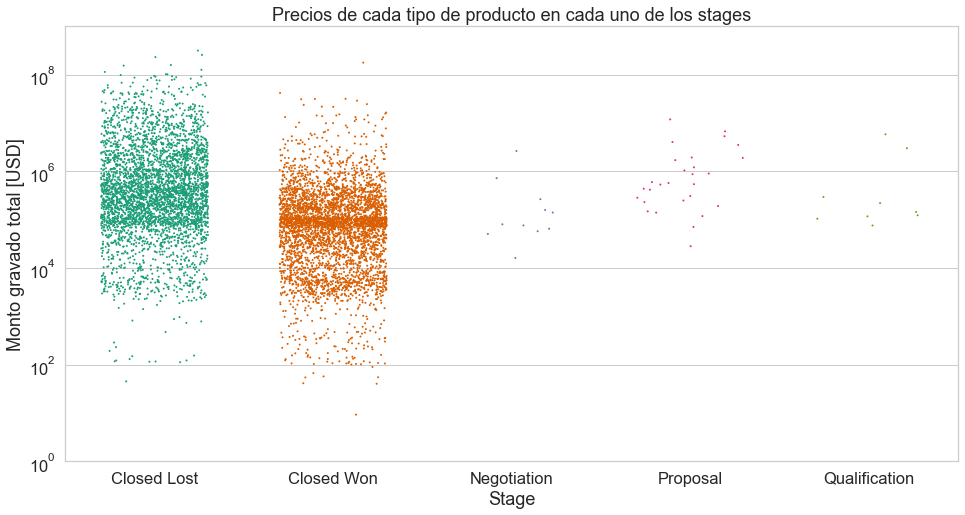

In [242]:
plt.figure(figsize=(16,8))
plt.yscale('log')
plt.ylim(1, 10e8)
plt.title('Precios de cada tipo de producto en cada uno de los stages')
ax = sns.stripplot(df_product.Stage, df_product["Total_Taxable_Amount_(converted)"], jitter=0.3, size=2, palette='Dark2')
ax.set( ylabel='Monto gravado total [USD]')

In [102]:
df_wonlost= df[(df['Stage']== 'Closed Won') | (df['Stage']== 'Closed Lost')]

In [149]:
df_wonlost_regionID = df_wonlost.groupby(['Stage', 'Region', 'Opportunity_ID']).agg({'Total_Taxable_Amount_(converted)':'first'}).reset_index().dropna()

In [150]:
df_wonlost_regionID.Stage.cat.remove_unused_categories(inplace = True)

In [151]:
df_wonlost_regionID = df_wonlost_regionID[df_wonlost_regionID['Total_Taxable_Amount_(converted)'] >10]

In [152]:
df_wonlost_regionID['Total_Taxable_Amount_(converted)'] = np.log10(df_wonlost_regionID['Total_Taxable_Amount_(converted)'])

c:\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



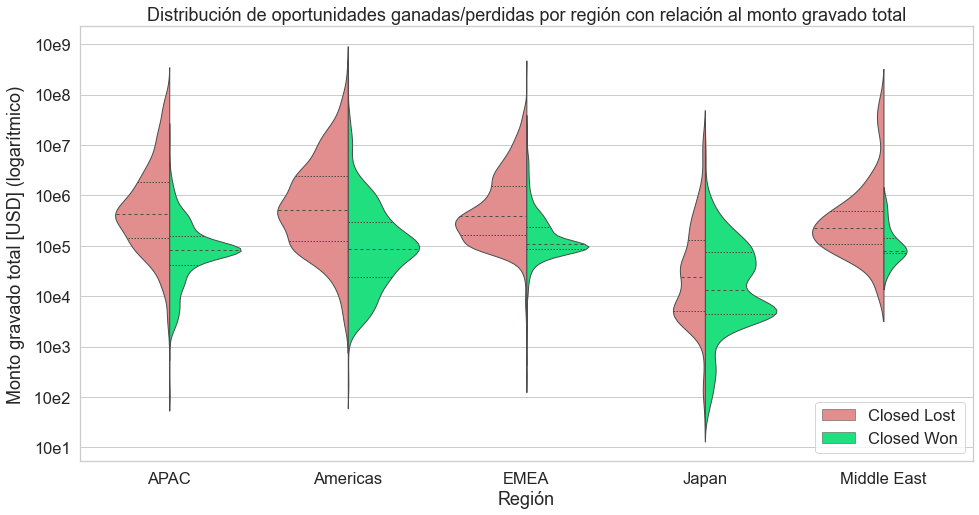

In [221]:
plt.figure(figsize=(16,8))
plt.title('Distribución de oportunidades ganadas/perdidas por región con relación al monto gravado total')
ax = sns.violinplot(data=df_wonlost_regionID, x='Region', y='Total_Taxable_Amount_(converted)', hue='Stage',
               split=True, inner="quartiles", linewidth=1, scale='count',
               palette={"Closed Won": "springgreen", 'Closed Lost': "lightcoral"})

ax.set_yticklabels(['10e0','10e1',' 10e2', '10e3', '10e4', '10e5', '10e6', '10e7', '10e8', '10e9'])
ax.set(ylabel='Monto gravado total [USD] (logarítmico)', xlabel='Región')
plt.legend(loc='lower right')

In [108]:
df[df['Total_Taxable_Amount_(converted)']>0].min()

ID                                                   4854
Pricing, Delivery_Terms_Quote_Appr                  False
Pricing, Delivery_Terms_Approved                    False
Bureaucratic_Code_0_Approval                        False
Bureaucratic_Code_0_Approved                        False
Submitted_for_Approval                              False
Account_Created_Date                  2013-07-27 00:00:00
Source                                               None
Opportunity_ID                                          0
Sales_Contract_No                                       0
Opportunity_Created_Date              2013-11-05 00:00:00
Price                                                   0
Quote_Expiry_Date                     2015-01-09 00:00:00
Last_Modified_Date                    2015-07-08 00:00:00
ASP                                                     0
ASP_(converted)                                         0
Planned_Delivery_Start_Date           2016-01-01 00:00:00
Planned_Delive

In [109]:
df_impuesto = df.groupby(['Territory', 'Opportunity_ID']).agg({'Total_Amount_(converted)':'sum', 'Total_Taxable_Amount_(converted)':'first', 'Stage':'first'}).reset_index().dropna()

In [110]:
df_impuesto['Tax']= df_impuesto['Total_Amount_(converted)']==df_impuesto['Total_Taxable_Amount_(converted)']

In [111]:
df_impuesto_fil = df_impuesto[df_impuesto['Tax'] == False]

In [112]:
df_impuesto_fil['Tasa_impuesto'] = df_impuesto['Total_Taxable_Amount_(converted)']/df_impuesto['Total_Amount_(converted)']

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
df_impuesto_fil.Tasa_impuesto.count()

1460

In [114]:
df_impuesto_fil

,Territory,Opportunity_ID,Total_Amount_(converted),Total_Taxable_Amount_(converted),Stage,Tax,Tasa_impuesto
20488,Australia,863,3.800201e+06,3.800201e+06,Closed Lost,False,1.000
20548,Australia,927,2.069990e+07,2.069990e+07,Closed Lost,False,1.000
21560,Australia,1964,4.444557e+05,4.444557e+05,Closed Won,False,1.000
21561,Australia,1965,4.444557e+05,4.444557e+05,Closed Won,False,1.000
22804,Australia,3250,2.186361e+07,0.000000e+00,Closed Lost,False,0.000
...,...,...,...,...,...,...,...
737811,United Kingdom,12536,3.654466e+06,5.938508e+06,Closed Lost,False,1.625
737882,United Kingdom,12610,1.708575e+06,1.708575e+06,Closed Lost,False,1.000
737967,United Kingdom,12695,1.624276e+06,3.248552e+06,Closed Won,False,2.000
738019,United Kingdom,12748,3.311024e+05,6.622048e+05,Closed Won,False,2.000


In [115]:
df_impuesto['Taxable']= df.Total_Taxable_Amount >= df.Total_Amount

In [116]:
df_impuesto.Taxable.value_counts()

True    3
Name: Taxable, dtype: int64

In [117]:
df_impuesto.Tax.value_counts()

True     8381
False    1460
Name: Tax, dtype: int64

In [118]:
df_impuesto_fil=df_impuesto_fil[(df_impuesto_fil['Tasa_impuesto']>0)&(round(df_impuesto_fil['Tasa_impuesto'], 1) != 1.0)]

In [119]:
px.scatter(df_impuesto_fil, x="Total_Amount_(converted)", y="Tasa_impuesto", color= 'Stage', title='Relación entre impuestos, montos, y ')
#Considero que no llega a una conclusión significante

In [279]:
dfproducts = df_won.groupby(['Opportunity_ID' ]).agg({'Month':'first', 'Region':'first', 'Total_Taxable_Amount_(converted)':'first'}).reset_index().dropna()
dfproducts.head(10)

,Opportunity_ID,Month,Region,Total_Taxable_Amount_(converted)
0,1,2016-01-01,EMEA,5.263822e+04
1,2,2016-01-01,Americas,8.386560e+04
2,7,2016-01-01,Americas,5.068800e+04
3,11,2016-01-01,APAC,1.621851e+06
4,20,2016-01-01,EMEA,1.130752e+05
5,21,2016-03-01,Americas,3.184974e+06
6,22,2016-01-01,Japan,2.045000e+03
7,23,2016-01-01,EMEA,2.290646e+05
8,24,2016-01-01,EMEA,2.290646e+05
9,27,2016-01-01,EMEA,4.493189e+05


In [280]:
dfproducts = dfproducts.groupby(['Month', 'Region']).agg({'Total_Taxable_Amount_(converted)':'sum'}).reset_index().dropna()
dfproducts.head(10)

,Month,Region,Total_Taxable_Amount_(converted)
0,2016-01-01,APAC,2.101291e+06
1,2016-01-01,Americas,7.860437e+07
2,2016-01-01,EMEA,1.145050e+07
3,2016-01-01,Japan,1.025437e+07
4,2016-02-01,APAC,2.307764e+06
5,2016-02-01,Americas,4.435586e+07
6,2016-02-01,EMEA,1.564778e+07
7,2016-02-01,Japan,3.674360e+06
8,2016-03-01,APAC,5.756619e+05
9,2016-03-01,Americas,5.897582e+06


[Text(0.5, 0, 'Mes de inicio de entrega'),
 Text(0, 0.5, 'Monto total gravado regional [USD]')]

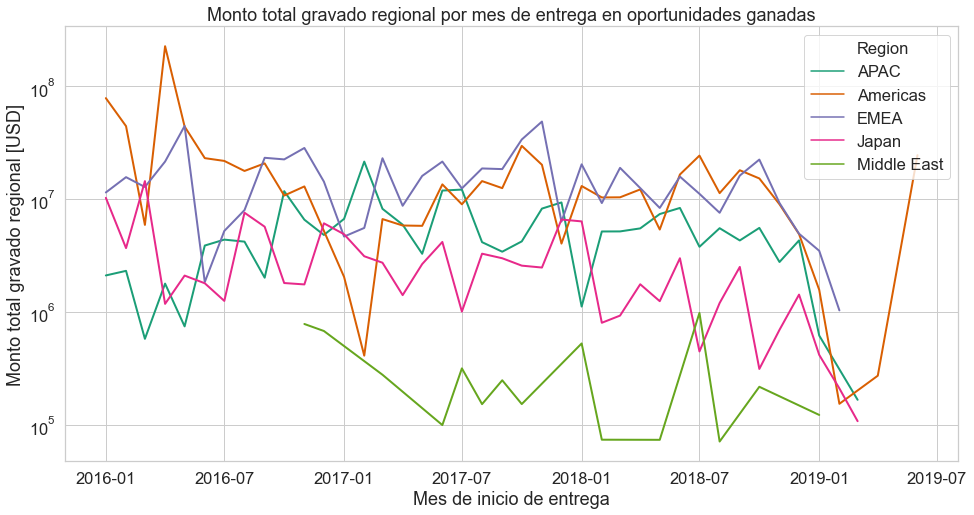

In [285]:
plt.figure(figsize=(16,8))
plt.yscale('log')
plt.title('Monto total gravado regional por mes de entrega en oportunidades ganadas')
ax = sns.lineplot(x=dfproducts.Month, y=dfproducts['Total_Taxable_Amount_(converted)'], hue=dfproducts.Region ,palette="Dark2", linewidth=2)
ax.set(xlabel='Mes de inicio de entrega', ylabel='Monto total gravado regional [USD]')

In [277]:
df.groupby(['Opportunity_Type']).agg({'Product_Type':'count', 'Opportunity_ID':pd.Series.nunique, 'Total_Taxable_Amount_(converted)':'mean'})

,Product_Type,Opportunity_ID,Total_Taxable_Amount_(converted)
Opportunity_Type,,,
Opportunity_Type_0,8,7,2.667270e+05
Opportunity_Type_1,6819,5160,5.370443e+05
Opportunity_Type_10,34,15,1.997427e+05
Opportunity_Type_11,3,2,5.671986e+05
Opportunity_Type_12,279,138,3.921595e+05
Opportunity_Type_13,4,4,1.954822e+06
Opportunity_Type_14,15,10,5.438283e+04
Opportunity_Type_15,9,9,6.670397e+05
Opportunity_Type_16,4,1,1.504931e+06
